<a href="https://colab.research.google.com/github/DigvijayPhutane/Linear_Regression_CO2_Emission/blob/main/Co2_emmisions_canada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [6]:
#reading data set
df = pd.read_csv('/content/CO2 Emissions_Canada.csv')

In [7]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [10]:
#checking columns
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [11]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [14]:
df.shape

(7385, 12)

In [15]:
#check null values
df.isna().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [16]:
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [17]:
df['Vehicle Class'].nunique()

16

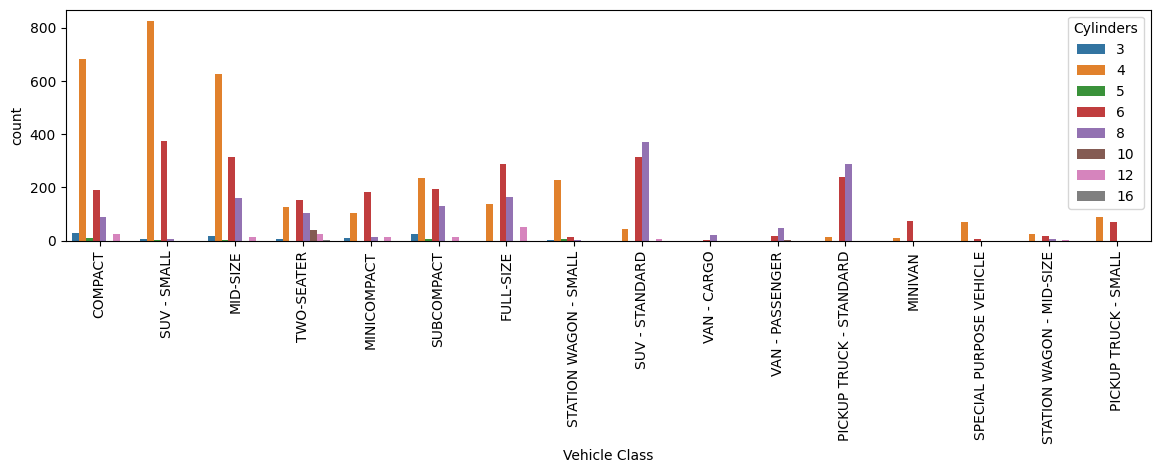

In [33]:
plt.figure(figsize=(14,3))
sns.countplot(data = df ,x = df['Vehicle Class'],hue = 'Cylinders')
plt.xticks(rotation = 90)
plt.show()

In [47]:
df['Model'].unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

In [48]:
df['Model'].nunique()

2053

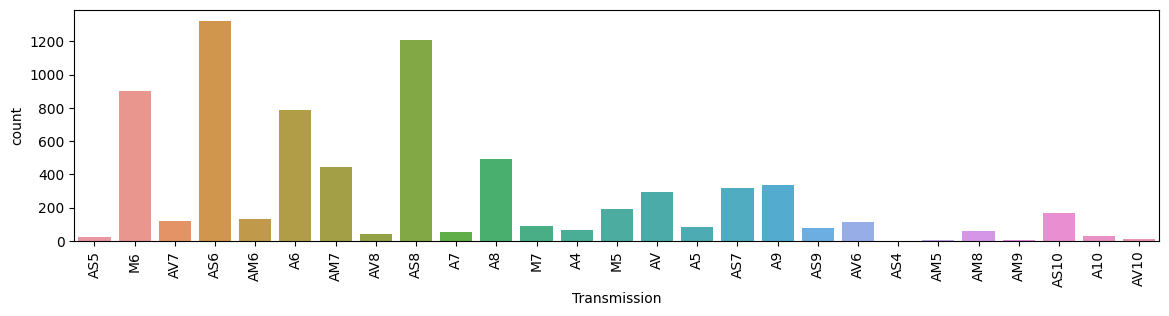

In [44]:
|plt.figure(figsize=(14,3))
sns.countplot(data = df,x = df['Transmission'])
plt.xticks(rotation = 90)
plt.show()

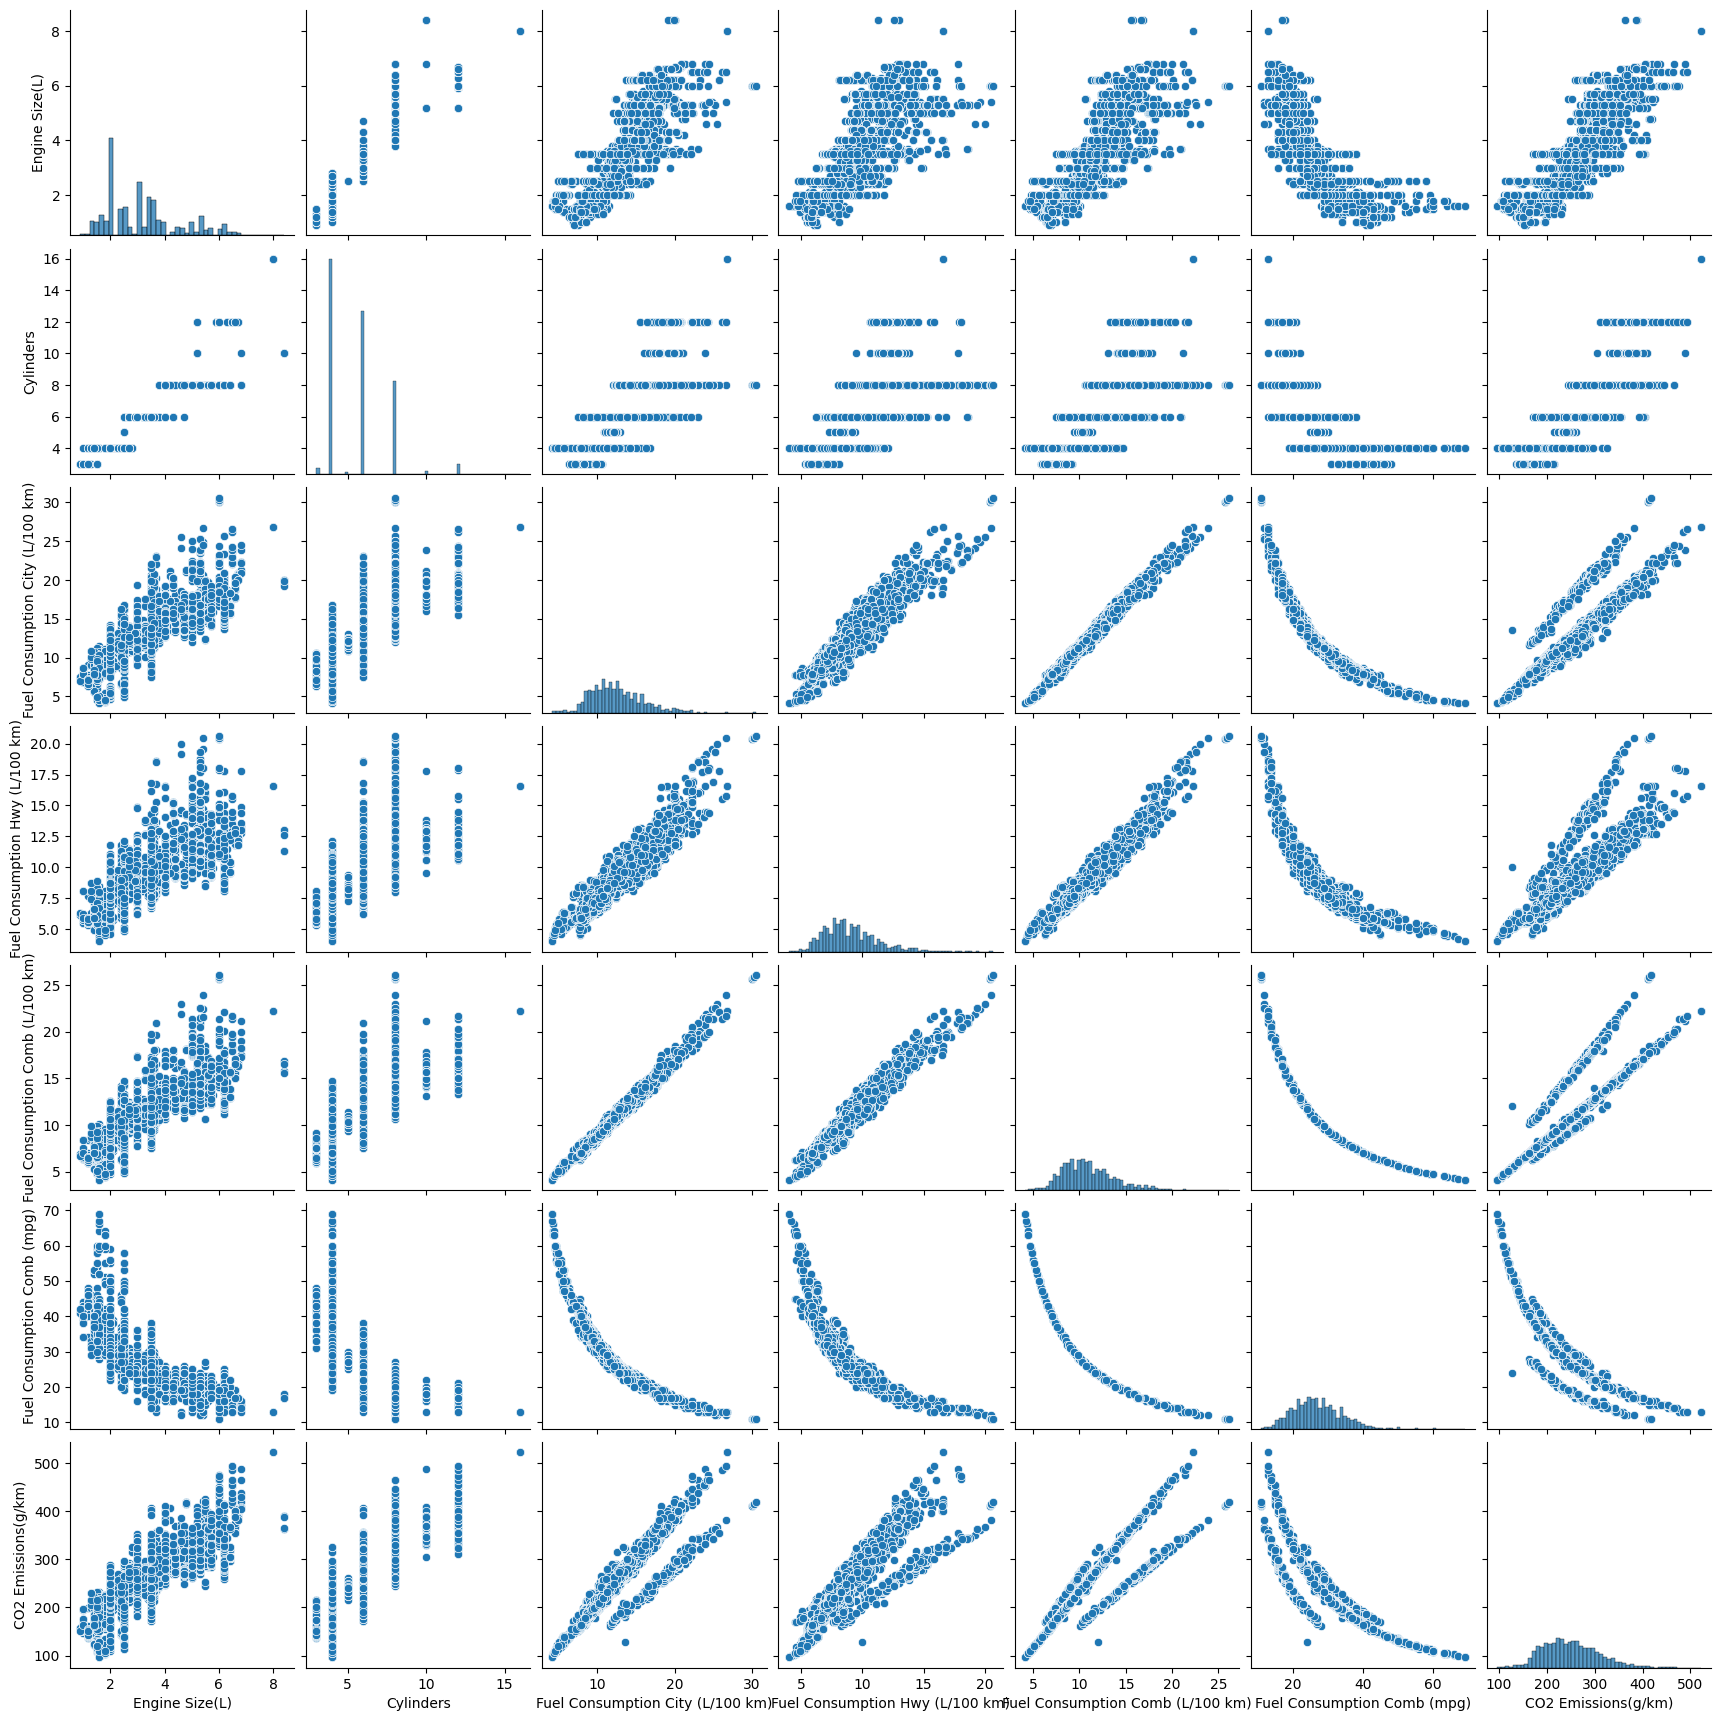

In [39]:
sns.pairplot(df)

<ipython-input-50-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

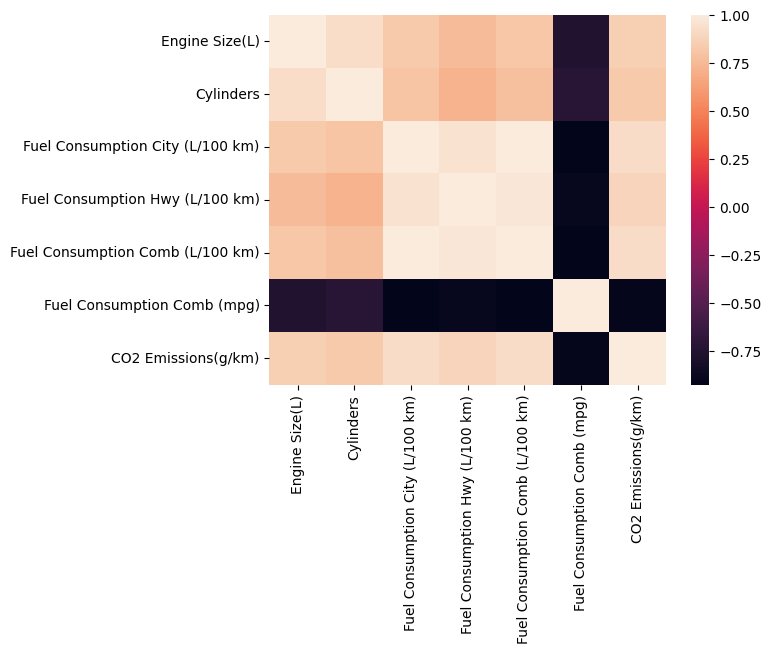

In [50]:
sns.heatmap(df.corr())

<Axes: xlabel='Fuel Type', ylabel='count'>

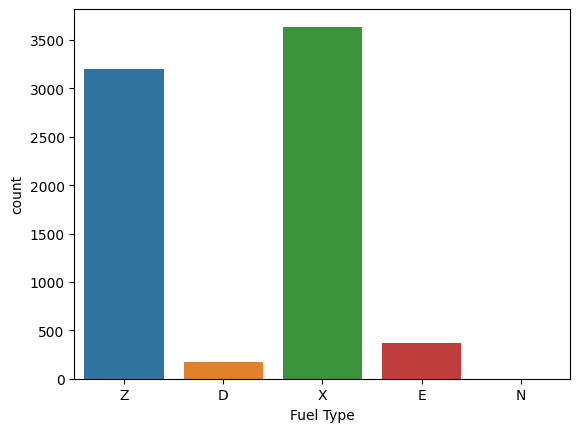

In [53]:
#use countplot
fuel_type=df['Fuel Type']
sns.countplot(data=df,x=fuel_type)

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Count'>

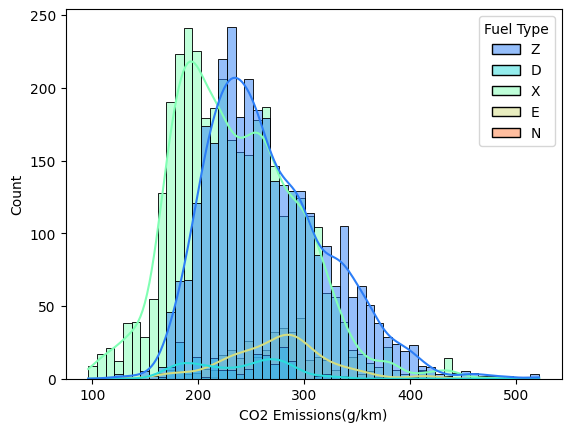

In [76]:
sns.histplot(data = df ,x='CO2 Emissions(g/km)',hue='Fuel Type',kde = True,palette='rainbow')

In [79]:
#select some speific columns
co = df.loc[:,['Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']]
co

,Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,4,9.9,6.7,8.5,33,196
1,4,11.2,7.7,9.6,29,221
2,4,6.0,5.8,5.9,48,136
3,6,12.7,9.1,11.1,25,255
4,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...
7380,4,10.7,7.7,9.4,30,219
7381,4,11.2,8.3,9.9,29,232
7382,4,11.7,8.6,10.3,27,240
7383,4,11.2,8.3,9.9,29,232


In [89]:
co.corr().style.background_gradient('Reds')

,Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Cylinders,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


<Figure size 1400x600 with 0 Axes>

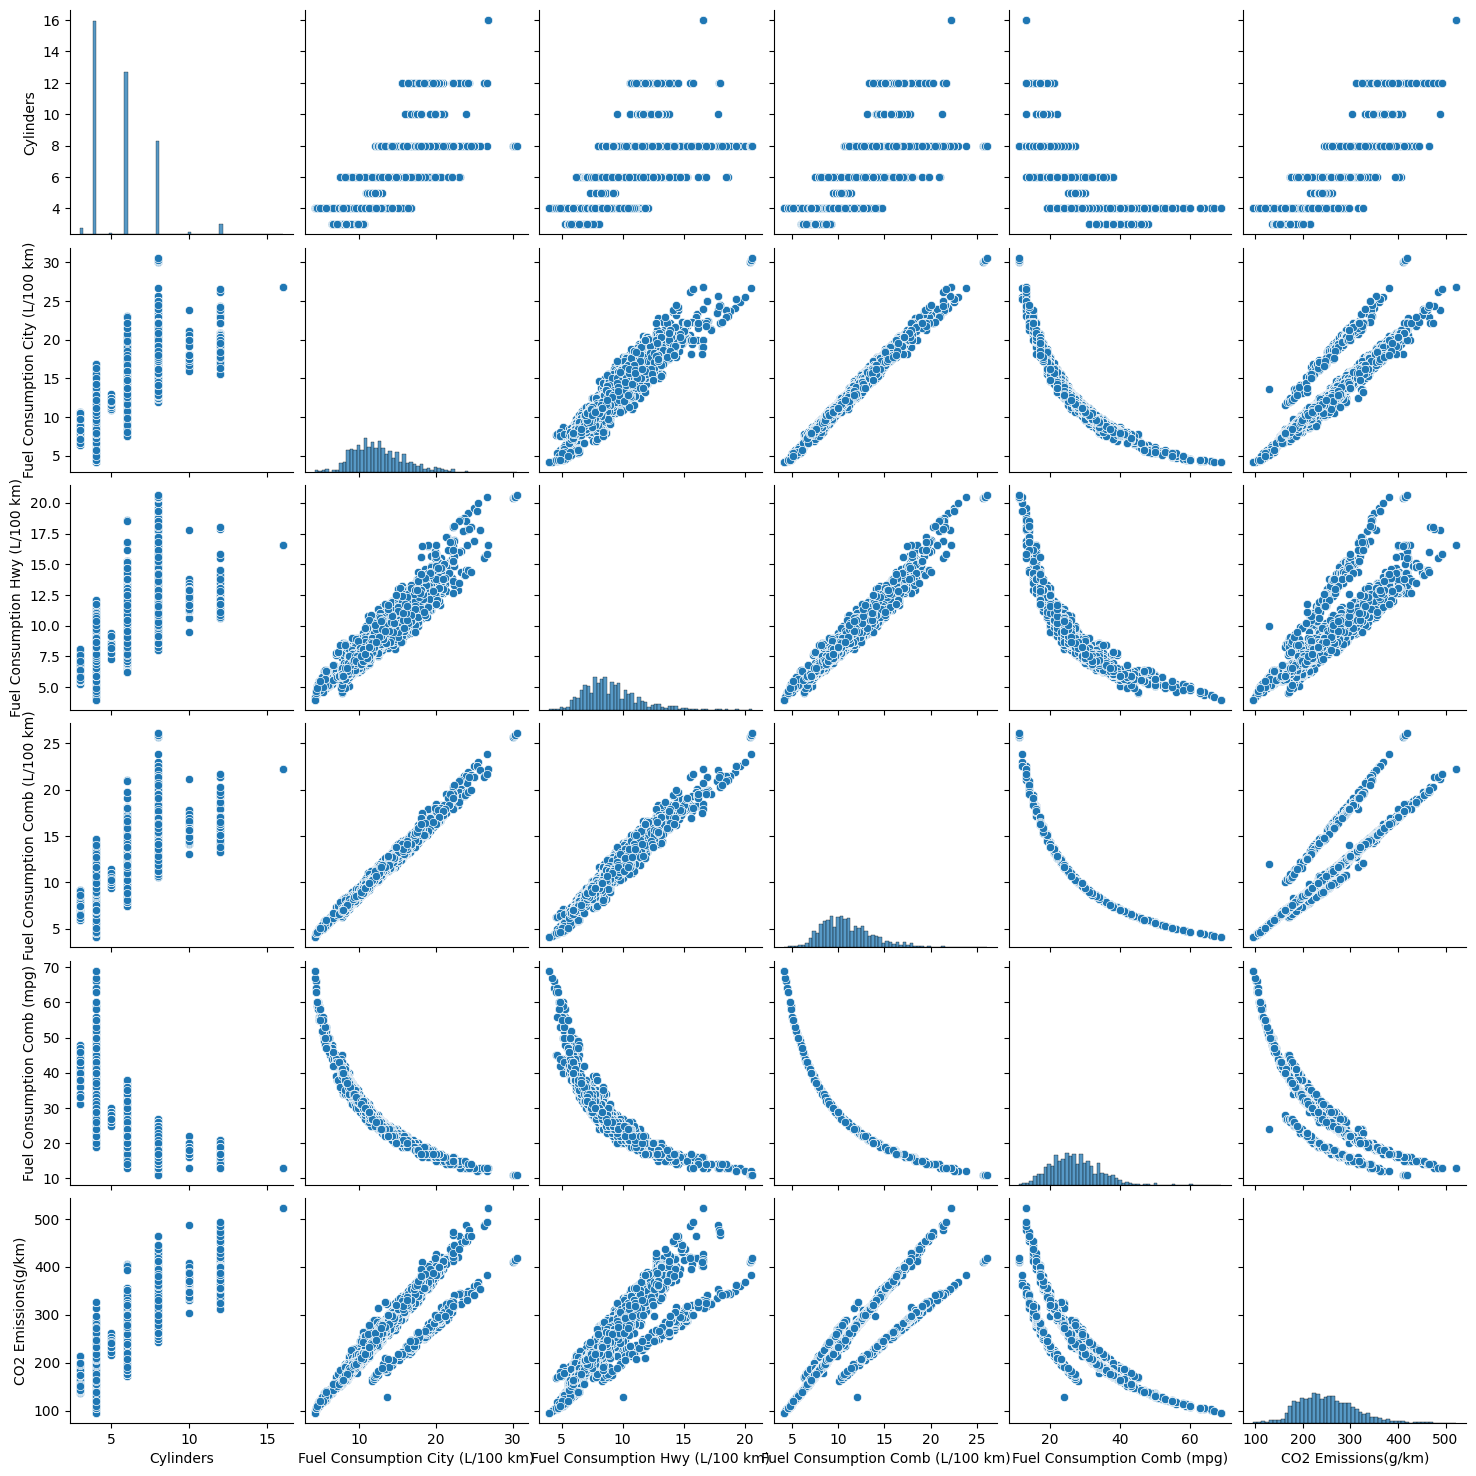

In [80]:
plt.figure(figsize=(14,6))
sns.pairplot(co)
plt.show()

In [81]:
X=co.loc[:,['Cylinders','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)','Fuel Consumption Comb (mpg)']]
X[:2]

,Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,4,9.9,6.7,8.5,33
1,4,11.2,7.7,9.6,29


In [82]:
y= co['CO2 Emissions(g/km)']
y[:2]

0    196
1    221
Name: CO2 Emissions(g/km), dtype: int64

In [83]:
model = LinearRegression()

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [85]:
model.fit(X_train,y_train)

LinearRegression()

In [86]:
model.predict(X_test)

array([268.26750102, 312.62304237, 197.65515794, ..., 346.88190407,
       301.98892861, 198.55099728])

In [87]:
model.score(X_train,y_train)*100

90.39194174793785

In [90]:
model.score(X_test,y_test)*100

89.57341530425951

In [91]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [92]:
y_pred = model.predict(X_test)
y_pred[:2]

array([268.26750102, 312.62304237])

In [93]:
test = pd.DataFrame(X_test)
test[:2]

,Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
4375,6,11.1,10.8,11.0,26
7247,8,15.1,11.2,13.3,21


In [94]:
test['Actual'] = y_test # create a column for actual output

In [95]:
test['predicted'] = y_pred # create a column for predicted output

In [96]:
test['error']= test.Actual - test.predicted

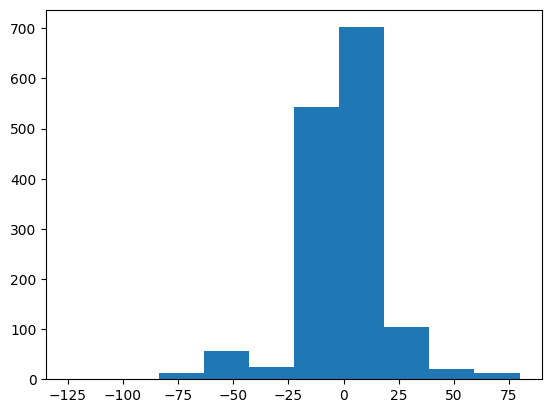

In [97]:
plt.hist(test.error)
plt.show()

In [98]:
mean_absolute_error(y_test,y_pred)

11.723182009203462

In [99]:
test[['Actual','predicted']].describe().T

,count,mean,std,min,25%,50%,75%,max
Actual,1477.0,250.681787,58.093983,96.000000,209.000000,245.000000,288.00000,522.000000
predicted,1477.0,250.969954,56.093190,53.240566,209.789428,248.890388,286.56854,466.128558


In [100]:
# MSE: impact of outlier matters
mean_squared_error(y_test,y_pred)

351.6496949302352

In [101]:
# RMSE: outliers affect in this case
np.sqrt(mean_squared_error(y_test,y_pred))

18.75232505398291

In [102]:
# r2 score: actual vs predicted works on whole dataset
# range is 0-1
# more close to 1 , more better ur model is
r2_score(y_test,y_pred)

0.8957341530425952

In [104]:
model.score(X_train,y_train)*100

90.39194174793785

In [105]:
# Data accuracy: score() X_train,y_train, X_test,y_test [input+output]
# Model accuracy: r2_score() --> y_test,y_pred[output+output]